In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
# knapsack problem (brute force solution)
def knapsack_brute_force(weights, values, capacity):
    n = len(weights)
    best_value = 0
    best_combination = []

    # iterate through all subsets of items (binary representation)
    for i in range(1 << n):  # Iterate through all subsets of items
        total_weight = total_value = 0
        combination = []

        # checking which items are included in the subset
        for j in range(n):
            if (i >> j) & 1:
                total_weight += weights[j]
                total_value += values[j]
                combination.append(j)

        # update the best combination if it fits the capacity and has higher value
        if total_weight <= capacity and total_value > best_value:
            best_value = total_value
            best_combination = combination

    return best_value

In [3]:
# knapsack problem (dynamic programming solution)
def knapsack_dp(weights, values, capacity):
    n = len(weights)
    # initialize dp table with 0
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # fill the dp table based on knapsack recurrence relation
    for i in range(n + 1):
        for w in range(capacity + 1):
            if i == 0 or w == 0:
                dp[i][w] = 0
            elif weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w - weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]

In [4]:
# measure time complexity of both knapsack solutions (brute force and dynamic programming)
def measure_knapsack_complexity():
    sizes = [10]  # different test case sizes (number of items)
    brute_force_times = []
    dp_times = []
    # generate random test cases of different sizes
    for size in sizes:
        weights = [random.randint(1, 50) for _ in range(size)]
        values = [random.randint(1, 100) for _ in range(size)]
        capacity = sum(weights) // 2  # set capacity to half the sum of weights

        # measure brute force time
        start_time = time.time()
        knapsack_brute_force(weights, values, capacity)
        brute_force_times.append(time.time() - start_time)

        # measure dynamic programming time
        start_time = time.time()
        knapsack_dp(weights, values, capacity)
        dp_times.append(time.time() - start_time)

    return sizes, brute_force_times, dp_times

In [5]:
# graph coloring problem (greedy algorithm)
def graph_coloring(graph):
    n = len(graph)
    colors = [-1] * n  # store the colors of vertices
    available = [False] * n  # track available colors for each vertex

    # assign the first color to the first vertex
    colors[0] = 0  

    # iterate over all vertices
    for u in range(1, n):
        available = [False] * n  # reset availability of colors
        # mark the unavailable colors due to adjacent vertices
        for v in graph[u]:
            if colors[v] != -1:
                available[colors[v]] = True

        # find the first available color
        color = 0
        while color < n and available[color]:
            color += 1

        # assign the found color to the current vertex
        colors[u] = color

    return colors

In [6]:
# measure time complexity of graph coloring
def measure_graph_coloring_complexity():
    sizes = [5]  # different test case sizes (number of vertices)
    coloring_times = []

    # generate random graphs of increasing size
    for size in sizes:
        graph = [[] for _ in range(size)]
        for i in range(size):
            for j in range(i+1, size):
                if random.random() > 0.5:  # randomly connect vertices with edges
                    graph[i].append(j)
                    graph[j].append(i)

        # measure graph coloring time
        start_time = time.time()
        graph_coloring(graph)
        coloring_times.append(time.time() - start_time)

    return sizes, coloring_times

In [7]:
# plot time complexity for both knapsack and graph coloring
def plot_time_complexity(knapsack_sizes, brute_force_times, dp_times, coloring_sizes, coloring_times):
    plt.figure(figsize=(10, 5))

    # knapsack time complexity plot
    plt.subplot(1, 2, 1)
    plt.plot(knapsack_sizes, brute_force_times, label="brute force", marker='o', linestyle='-', color='r')
    plt.plot(knapsack_sizes, dp_times, label="dynamic programming", marker='o', linestyle='-', color='g')
    plt.xlabel("number of items")
    plt.ylabel("time (seconds)")
    plt.title("knapsack time complexity")
    plt.legend()

    # graph coloring time complexity plot
    plt.subplot(1, 2, 2)
    plt.plot(coloring_sizes, coloring_times, label="graph coloring", marker='o', linestyle='-', color='b')
    plt.xlabel("number of vertices")
    plt.ylabel("time (seconds)")
    plt.title("graph coloring time complexity")
    plt.legend()

    plt.tight_layout()
    plt.show()

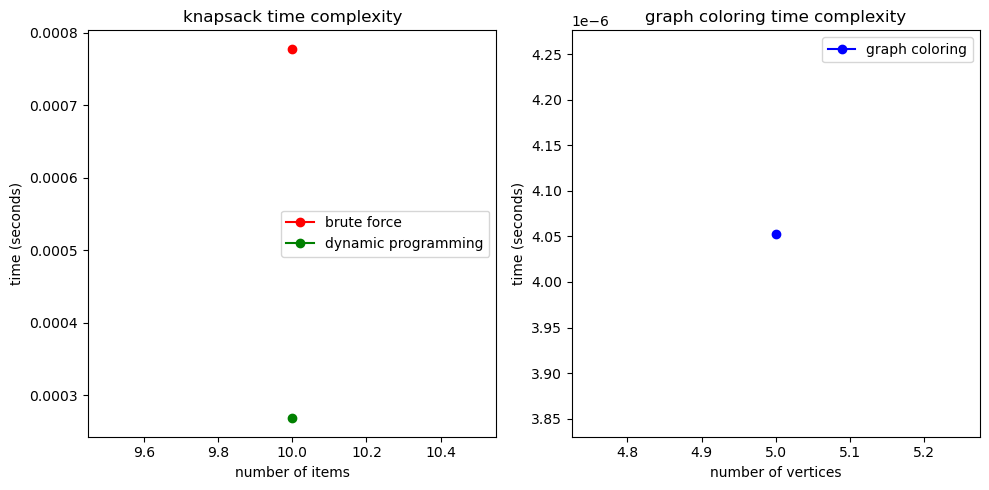

In [8]:
# main function to run the tests and plot the graphs
def main():
    # measure and plot knapsack time complexity
    knapsack_sizes, brute_force_times, dp_times = measure_knapsack_complexity()

    # measure and plot graph coloring time complexity
    coloring_sizes, coloring_times = measure_graph_coloring_complexity()

    # plot the time complexities for both problems
    plot_time_complexity(knapsack_sizes, brute_force_times, dp_times, coloring_sizes, coloring_times)

# run the main function
if __name__ == "__main__":
    main()